In [16]:
import operator
import matplotlib.pyplot as plt
from decimal import *

games={}
genres=set()
publishers=set()

with open('dataset/games.csv', 'r', encoding = "ISO-8859-1") as ip:
    next(ip)
    for line in ip:
        line=line.strip()
        line=line.split(',')
        publishers.add(line[4])
        genres.add(line[3])
        if line[0] in games:
            # print(line[0])
            games[line[0]].extend(line)
        else:
            games[line[0]] = line

print('Number of unique games', len(games.keys()))
print('Number of genres', len(genres))
print('Number of publishers', len(publishers))



def getTopPublishers():
    gamesByPublishers={}
    for publisher in publishers:
        gamesByPublishers[publisher]=[0, 0]
    for publisher in publishers:
        for game in games:
            i=4
            while(i<len(games[game])):
                if games[game][i] == publisher:
                    gamesByPublishers[publisher][0] +=1
                    gamesByPublishers[publisher][1] += float(games[game][i+5])
                i+=16

    sortedGames=sorted(gamesByPublishers.items(), key=lambda x: x[1][0], reverse=True)
    sortedSales=sorted(gamesByPublishers.items(), key=lambda x: x[1][1], reverse=True)
    return [sortedGames[:10], sortedSales[:10]]

Number of unique games 11563
Number of genres 13
Number of publishers 582


In [17]:
def getGameGenresForPublishers():
    #dictionary with publishers as keys and counts of games in different genres as values
    genresByPublishers={}

    for entry in games:
        print (entry)
        publisher=games[entry][4]
        genre=games[entry][3]
        if publisher not in genresByPublishers:
            genresByPublishers[publisher] = initGenres()
            genresByPublishers[publisher][genre]=1
        else:
            if genre not in genresByPublishers[publisher]:
                genresByPublishers[publisher][genre] = 1
            else:
                genresByPublishers[publisher][genre] +=1

    return genresByPublishers

def initGenres():
    return {x:0 for x in genres}


['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment', 'THQ', 'Nintendo', 'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive']


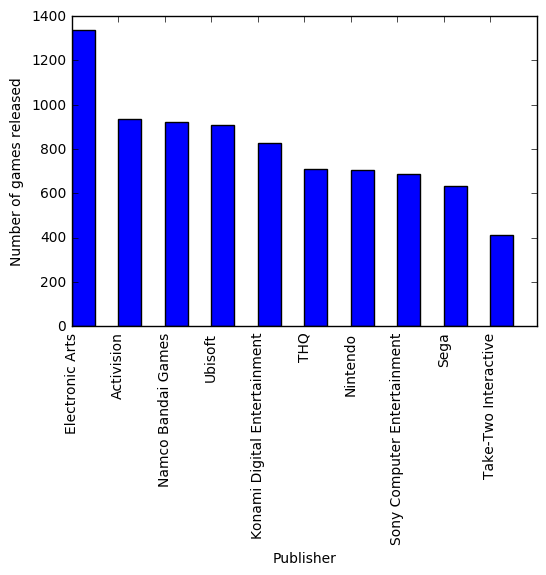

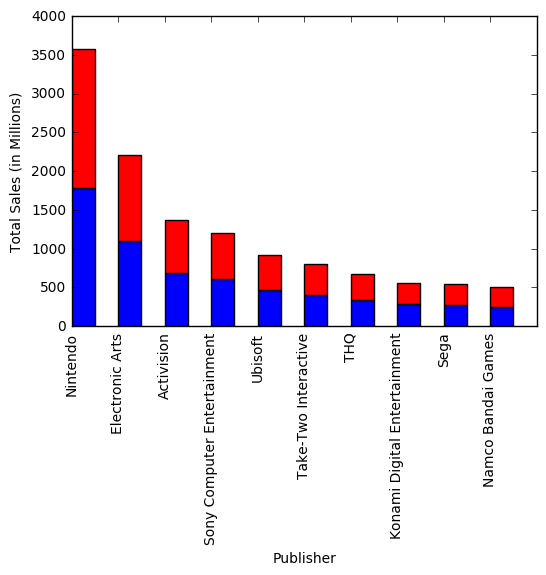

In [6]:
def plotTopPublishers():    
    bar_width=10
    vals=[]
    pub=[]
    index=[]
    ctr=0
    games=getTopPublishers()[0]
    for entry in games:
        vals.append(entry[1][0])
        pub.append(entry[0])
        index.append(ctr)
        ctr+=1
    print(pub)
    N = len(vals)
    x = range(N)
    plt.bar(x, vals, align='edge', width=0.5)
    plt.xticks(index, pub, rotation='vertical')
    plt.xlabel('Publisher')
    plt.ylabel('Number of games released')
    plt.show()
    
def plotTopSellingPublishers():
    vals=[]
    pub=[]
    index=[]
    ctr=0
    games=getTopPublishers()[1]
    for entry in games:
        vals.append(entry[1][1])
        pub.append(entry[0])
        index.append(ctr)
        ctr+=1
    # print(pub)
    N = len(vals)
    x = range(N)
    plt.bar(x, vals, align='edge', width=0.5, color='red')
    plt.xticks(index, pub, rotation='vertical')
    plt.xlabel('Publisher')
    plt.ylabel('Total Sales (in Millions)')
    plt.show()

plotTopPublishers()
plotTopSellingPublishers()

In [23]:
def getGameGenreAndSales():
    result={}
    vals=getTopPublishers()[0]
    pub=[]
    for val in vals:
        pub.append(val[0])
    for entry in games:
        publisher=games[entry][4]
        if publisher in pub:
            genre = games[entry][3]
            salesGlobal = float(games[entry][9])
            if publisher not in result:
                result[publisher]={}
                result[publisher][genre] = salesGlobal
            else:
                if genre not in result[publisher]:
                    result[publisher][genre] = salesGlobal
                else:
                    result[publisher][genre] += salesGlobal
    return result

vals=[]
pub=[]
index=[]
ctr=0
games=getGameGenreAndSales()
for entry in games:
    vals.append(games[entry])
    pub.append(entry)
    index.append(ctr)
    ctr+=1
# print(pub)
N = len(vals)
x = range(N)
plt.bar(x, vals, align='edge', width=0.5, color='red')
plt.xticks(index, pub, rotation='vertical')
plt.xlabel('Publisher')
plt.ylabel('Total Sales (in Millions)')
plt.show()

{'THQ': {'Misc': 15.659999999999998, 'Action': 54.019999999999996, 'Shooter': 10.520000000000003, 'Racing': 21.939999999999998, 'Fighting': 48.61, 'Platform': 23.570000000000004, 'Strategy': 6.47, 'Adventure': 17.250000000000004, 'Simulation': 6.000000000000001, 'Sports': 11.920000000000002, 'Puzzle': 6.0600000000000005, 'Role-Playing': 1.1300000000000001}, 'Take-Two Interactive': {'Misc': 7.399999999999999, 'Simulation': 0.8900000000000001, 'Action': 135.51999999999998, 'Racing': 17.24, 'Sports': 38.500000000000014, 'Strategy': 4.79, 'Puzzle': 0.07, 'Shooter': 31.98, 'Adventure': 4.72, 'Role-Playing': 5.68, 'Platform': 2.11}, 'Konami Digital Entertainment': {'Misc': 15.809999999999999, 'Action': 58.06000000000003, 'Shooter': 9.04, 'Racing': 1.1, 'Fighting': 1.5899999999999999, 'Platform': 13.68, 'Strategy': 10.929999999999998, 'Adventure': 9.409999999999998, 'Simulation': 30.3, 'Sports': 75.03000000000004, 'Puzzle': 0.56, 'Role-Playing': 13.659999999999998}, 'Ubisoft': {'Misc': 72.659